In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
import seaborn as sns
dataFrame = pd.read_csv("heart_2020_cleaned.csv")
dataFrame

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [169]:
dataFrame.shape

(319795, 18)

In [170]:
dataFrame.isnull().sum() # Checking That Dataset Have Null Value Or Not

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [171]:
dataFrame.duplicated().sum() #Cheking How Many Duplicate Row Dataset Have 

18078

In [172]:
dataFrame.drop_duplicates(inplace=True) # Droping Duplicate Value 

In [173]:
dataFrame.shape # After Droping Duplicate Value Shape Of DataSet

(301717, 18)

In [174]:
dataFrame.info() #Checking DataType Of Column 

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [175]:
dataFrame.describe() # Describing DataSet 

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [176]:
dataFrame.nunique() # From This We Can Know That which Column have Numeric Value Or Category 

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [177]:
dataFrame["HeartDisease"].value_counts()
'''From This We Conclude That Dataset Is Heavily Imbalanced
    Because The DataSet Is More Align To No-Heart Disease Patient
    So I Have To Remove Noise And Critical point From DataSet
    To Bifurcate Heart Disease Patient So I Can Predict Accurate 
    Result From Symptoms.'''

'From This We Conclude That Dataset Is Heavily Imbalanced\n    Because The DataSet Is More Align To No-Heart Disease Patient\n    So I Have To Remove Noise And Critical point From DataSet\n    To Bifurcate Heart Disease Patient So I Can Predict Accurate \n    Result From Symptoms.'

<Axes: >

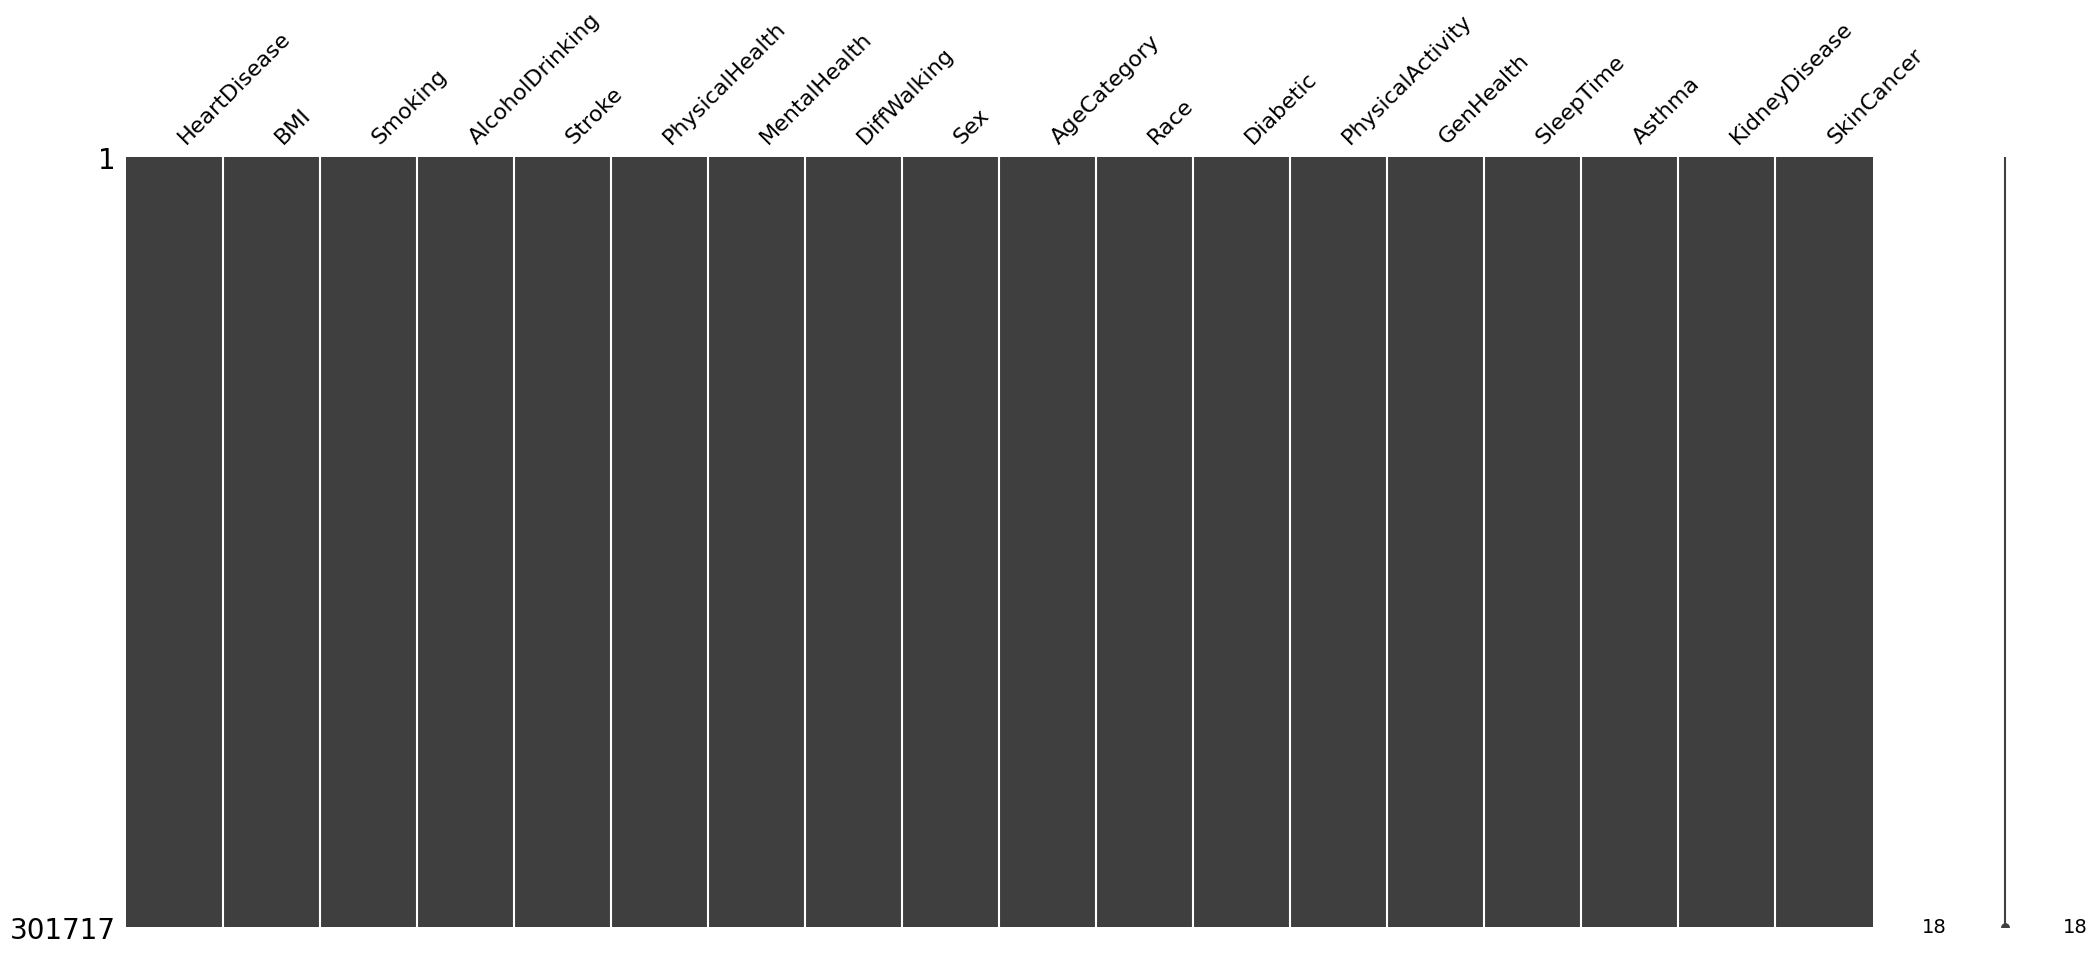

In [178]:
import missingno as mn
mn.matrix(dataFrame)

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categoricalColumn = []
numericalColumn = []
dataFrame1 = dataFrame.copy(deep=True)
for i in dataFrame.columns:
    if len(dataFrame[i].unique()) > 6:
        numericalColumn.append(i)
    else:
        dataFrame1[i]=le.fit_transform(dataFrame1[i])
        categoricalColumn.append(i)
print("Categorical Columns",categoricalColumn)
print("Numerical Columns",numericalColumn)

Categorical Columns ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Numerical Columns ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


In [180]:
dataFrame.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [181]:
dataFrame1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,5,0,1,4,8.0,0,0,0


In [182]:
def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)
    
    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2
    
    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return float(age_min) + 10  # treats '80 or older' as 90

    return float(age)  # or any other default value you prefer

dataFrame1['AgeCategory'] = dataFrame1['AgeCategory'].apply(convert_age_range_to_mean)

BMI                  Axes(0.125,0.747241;0.133621x0.132759)
PhysicalHealth    Axes(0.285345,0.747241;0.133621x0.132759)
MentalHealth       Axes(0.44569,0.747241;0.133621x0.132759)
SleepTime         Axes(0.606034,0.747241;0.133621x0.132759)
dtype: object

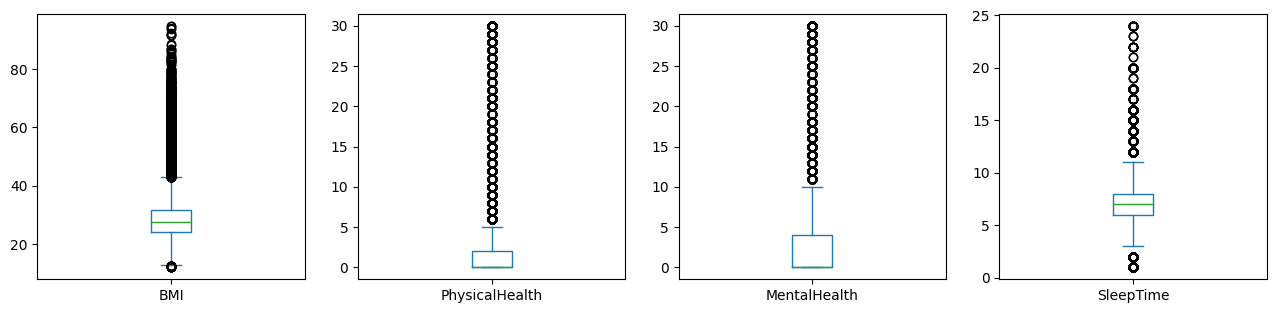

In [183]:
dataFrame.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (5,5))

C:\Users\Vraj\AppData\Local\Temp\ipykernel_15116\1031763043.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='SleepTime', ylabel='Density'>

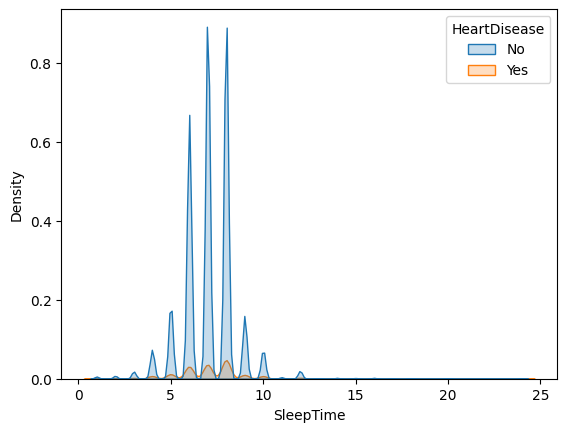

In [184]:
sns.kdeplot(data=dataFrame,x="SleepTime",hue='HeartDisease',shade='True')

C:\Users\Vraj\AppData\Local\Temp\ipykernel_15116\1307851392.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='PhysicalHealth', ylabel='Density'>

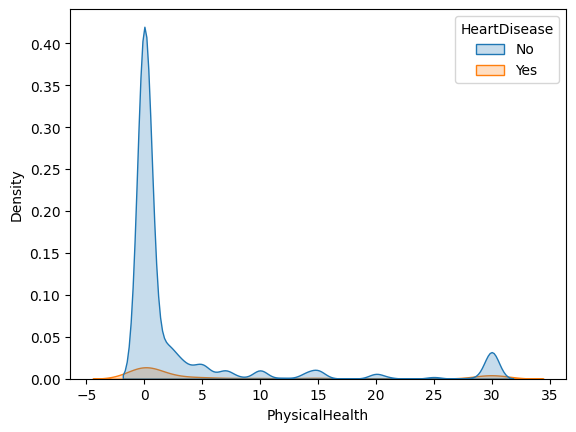

In [185]:
sns.kdeplot(data=dataFrame,x="PhysicalHealth",hue='HeartDisease',shade='True')

C:\Users\Vraj\AppData\Local\Temp\ipykernel_15116\683023353.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='MentalHealth', ylabel='Density'>

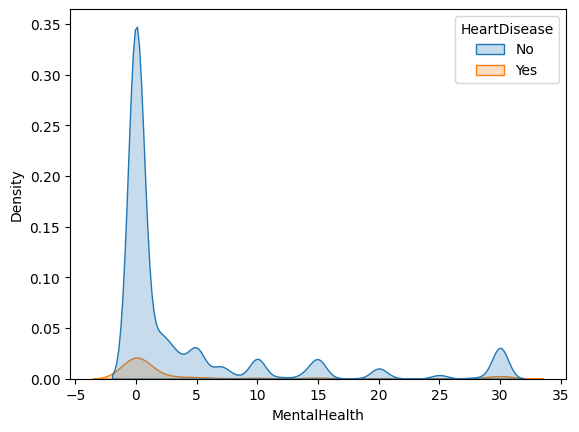

In [186]:

sns.kdeplot(data=dataFrame,x="MentalHealth",hue='HeartDisease',shade='True')

C:\Users\Vraj\AppData\Local\Temp\ipykernel_15116\2167192573.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='BMI', ylabel='Density'>

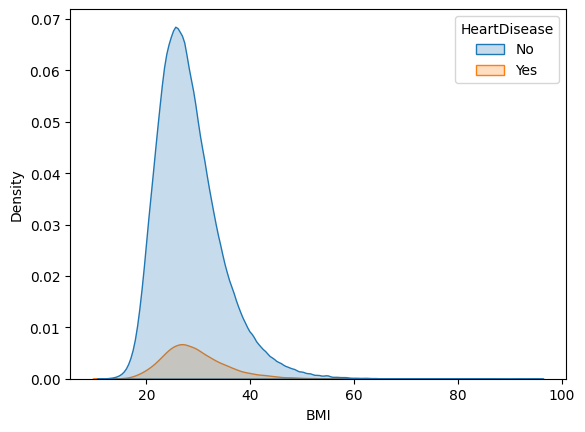

In [187]:
sns.kdeplot(data=dataFrame,x='BMI',hue='HeartDisease',shade=True)

([<matplotlib.patches.Wedge at 0x247207271d0>,
 [Text(-1.0559821726450649, 0.3080611157803087, 'No'),
  Text(1.055982158223682, -0.30806116521440213, 'Yes')],
 [Text(-0.5759902759882171, 0.16803333588016836, '91%'),
  Text(0.5759902681220083, -0.16803336284421933, '9%')])

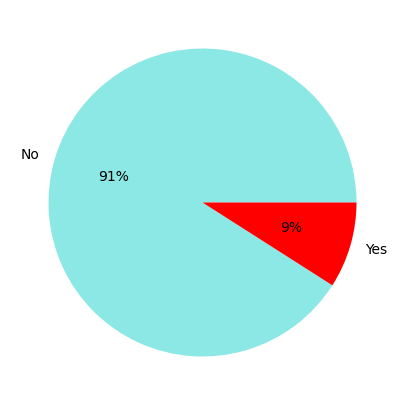

In [188]:
da2=dataFrame['HeartDisease'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(da2, labels=['No','Yes'], colors=["#8BE8E5","#FF0000"], autopct='%.0f%%')

In [189]:
fig = px.sunburst(dataFrame, path=['Sex','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

<Axes: >

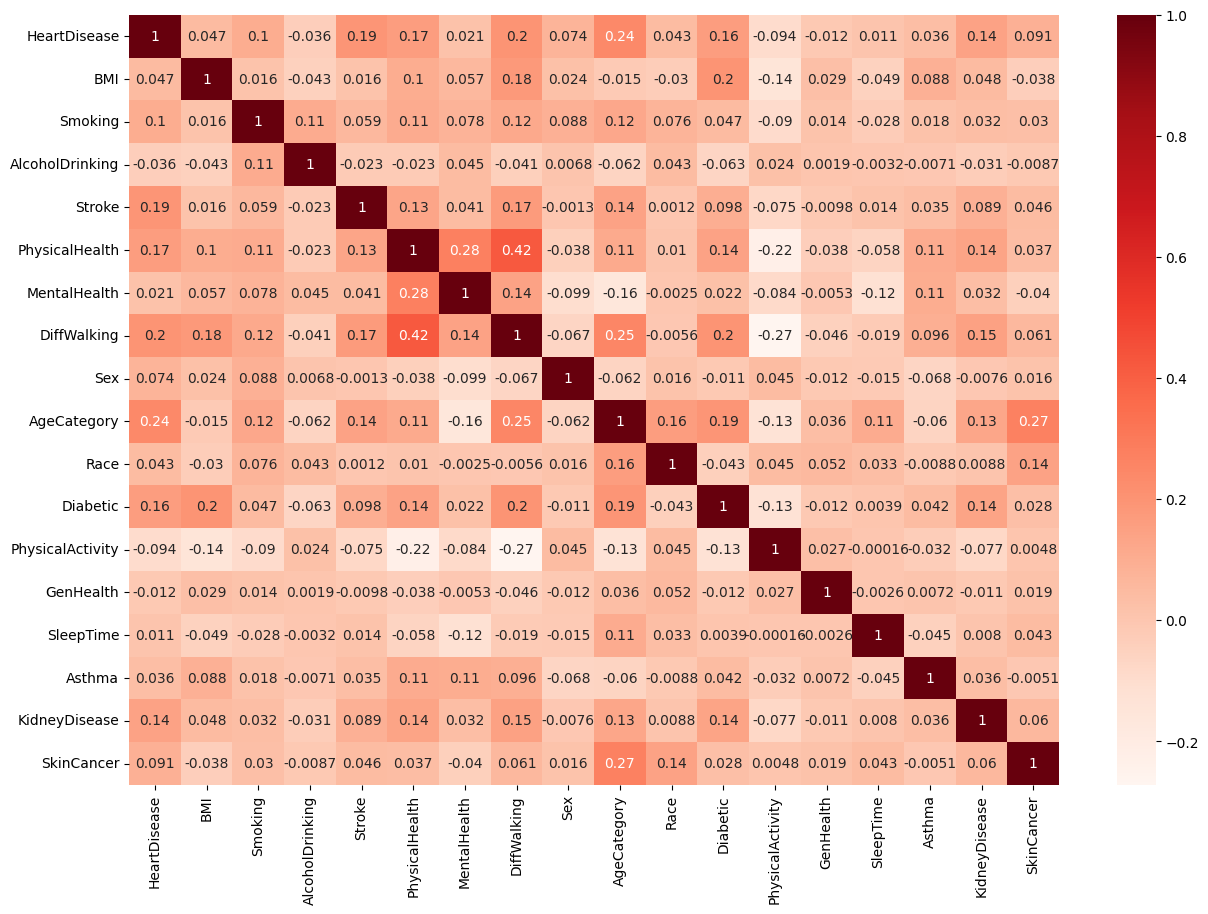

In [190]:
plt.figure(figsize = (15,10))
sns.heatmap(dataFrame1.corr(),annot = True,cmap='Reds')

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = dataFrame1.drop('HeartDisease',axis=1)
y = dataFrame1['HeartDisease']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 42)
model  = RandomForestClassifier(n_estimators = 100 ,max_depth=25)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(211201, 17)
(90516, 17)
(211201,)
(90516,)


In [192]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print("Train Score : ",model.score(xtrain,ytrain)," Test Score : ",model.score(xtest,ytest))

Train Score :  0.9784139279643562  Test Score :  0.9079720712360245


In [193]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred)*100)


90.79720712360245


In [194]:
# Over Sample The Data 

In [195]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
xover,yover = oversample.fit_resample(x,y)
xtrain,xtest,ytrain,ytest = train_test_split(xover,yover,test_size = 0.30,random_state = 42)
model  = RandomForestClassifier(n_estimators = 100 ,max_depth=25)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(384238, 17)
(164674, 17)
(384238,)
(164674,)


In [196]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print("Train Score : ",model.score(xtrain,ytrain)," Test Score : ",model.score(xtest,ytest))
print(accuracy_score(ytest,ypred)*100)

Train Score :  0.9658675092000271  Test Score :  0.9339665035160377
93.39665035160377


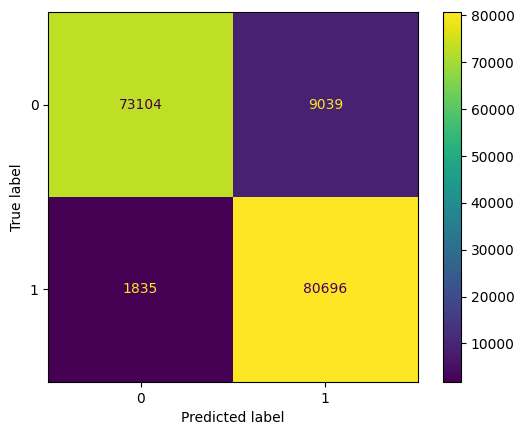

In [197]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmat = confusion_matrix(ytest,ypred)
cdis = ConfusionMatrixDisplay(cmat)
cdis.plot()

In [198]:
# Under Sample The Data (Here Under Sampling Does Not Work Because Machine Do Not Learn Much From This.)

In [199]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
xunder,yunder = undersample.fit_resample(x,y)
xtrain,xtest,ytrain,ytest = train_test_split(xunder,yunder,test_size = 0.30,random_state = 42)
model  = RandomForestClassifier(n_estimators = 100 ,max_depth=25)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(38165, 17)
(16357, 17)
(38165,)
(16357,)


In [200]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print("Train Score : ",model.score(xtrain,ytrain)," Test Score : ",model.score(xtest,ytest))
print(accuracy_score(ytest,ypred)*100)

Train Score :  0.9855888903445565  Test Score :  0.7470196246255426
74.70196246255426
